Capture at t = 30.449


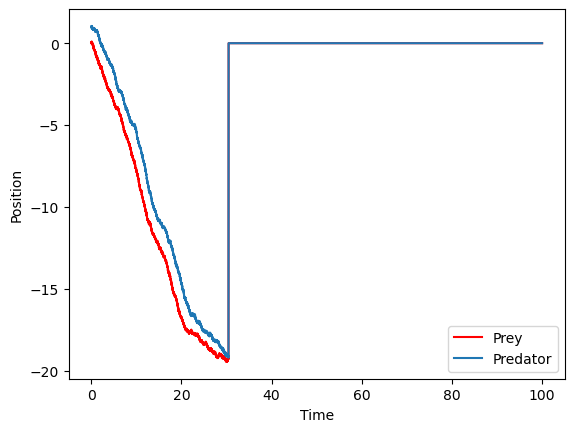

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.001
T = 100
N = int(T / dt)

# Coefficients
mu = 0.1
nu = 0.1
lambda_coef = 0.5
kappa = 0.5
sigma = 0.2
xi = 0.2

# Initial positions
x = np.zeros(N)
y = np.zeros(N)
x[0] = 0.0
y[0] = 1.0

# Wiener processes
W = np.random.normal(0, np.sqrt(dt), N)
Z = np.random.normal(0, np.sqrt(dt), N)

# Simulation loop
for t in range(1, N):
    dx = (mu - lambda_coef * (y[t-1] - x[t-1])) * dt + sigma * W[t]
    dy = (nu + kappa * (x[t-1] - y[t-1])) * dt + xi * Z[t]
    x[t] = x[t-1] + dx
    y[t] = y[t-1] + dy

    if np.abs(x[t] - y[t]) < 0.01:  # Capture condition
        print(f"Capture at t = {t * dt}")
        break

# Plotting
plt.plot(np.arange(N) * dt, x, label='Prey', color='red')
plt.plot(np.arange(N) * dt, y, label='Predator')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()


Capture at t = 20.796


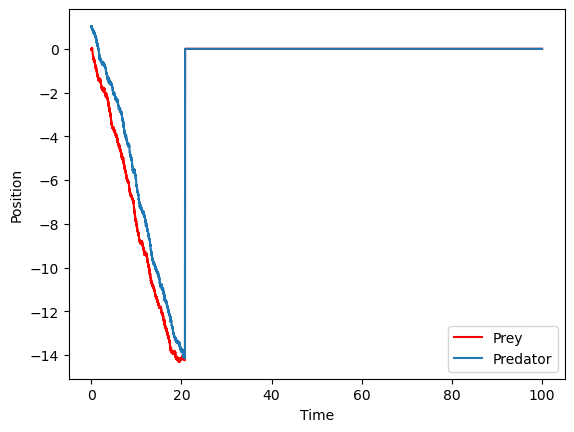

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.001
T = 100
N = int(T / dt)

# Coefficients
mu = -0.1
nu = -0.1
lambda_coef = 0.5
kappa = 0.5
sigma = 0.2
xi = 0.2

# Initial positions
x = np.zeros(N)
y = np.zeros(N)
x[0] = 0.0
y[0] = 1.0

# Wiener processes
W = np.random.normal(0, np.sqrt(dt), N)
Z = np.random.normal(0, np.sqrt(dt), N)

# Simulation loop
for t in range(1, N):
    dx = (mu - lambda_coef * (y[t-1] - x[t-1])) * dt + sigma * W[t]
    dy = (nu + kappa * (x[t-1] - y[t-1])) * dt + xi * Z[t]
    x[t] = x[t-1] + dx
    y[t] = y[t-1] + dy

    if np.abs(x[t] - y[t]) < 0.01:  # Capture condition
        print(f"Capture at t = {t * dt}")
        break

# Plotting
plt.plot(np.arange(N) * dt, x, label='Prey', color='red')
plt.plot(np.arange(N) * dt, y, label='Predator')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()


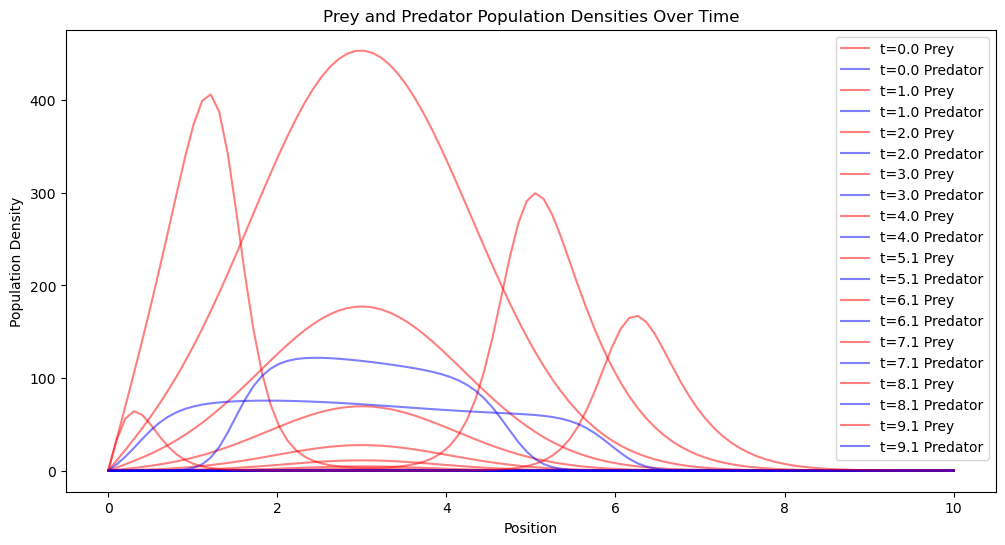

The predator caught the prey at time 6.87 seconds.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
D_u = 0.1      # Diffusion coefficient for prey
D_v = 0.1      # Diffusion coefficient for predator
r = 1.0        # Growth rate of prey
alpha = 0.1    # Predation rate coefficient
s = 0.5        # Death rate of predator
beta = 0.02    # Reproduction rate of predator

# Spatial and temporal discretization
L = 10.0       # Length of the spatial domain
Nx = 100       # Number of spatial points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

T = 10.0       # Total time
dt = 0.1      # Time step
Nt = int(T / dt)  # Number of time steps
t = np.linspace(0, T, Nt)

# Initial conditions
u0 = np.exp(-((x - 3)**2) / 0.5)   # Initial prey density
v0 = np.exp(-((x - 7)**2) / 0.5)   # Initial predator density

# Combine initial conditions
U0 = np.concatenate([u0, v0])

# Reaction functions
def reaction(U, t):
    u, v = U[:Nx], U[Nx:]
    dudt = r * u - alpha * u * v
    dvdt = -s * v + beta * u * v
    return np.concatenate([dudt, dvdt])

# Diffusion functions
def diffusion(U):
    u, v = U[:Nx], U[Nx:]
    d2udx2 = np.zeros(Nx)
    d2vdx2 = np.zeros(Nx)
    # Applying Neumann boundary conditions
    d2udx2[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
    d2vdx2[1:-1] = (v[:-2] - 2*v[1:-1] + v[2:]) / dx**2
    dudt = D_u * d2udx2
    dvdt = D_v * d2vdx2
    return np.concatenate([dudt, dvdt])

# Combined function for the ODE solver
def rhs(t, U):
    return reaction(U, t) + diffusion(U)

# Solving the PDEs using solve_ivp
sol = solve_ivp(rhs, [0, T], U0, method='RK45', t_eval=t)

# Extracting results
u_sol = sol.y[:Nx, :]
v_sol = sol.y[Nx:, :]

# Define catch threshold
catch_threshold = 0.1

# Check for overlap and catch time
catch_time = None
for i in range(Nt):
    overlap = np.any((u_sol[:, i] > catch_threshold) & (v_sol[:, i] > catch_threshold))
    if overlap:
        catch_time = t[i]
        break

# Plotting the results
plt.figure(figsize=(12, 6))
for i in range(0, Nt, Nt//10):
    plt.plot(x, u_sol[:, i], label=f't={t[i]:.1f} Prey', color='red', alpha=0.5)
    plt.plot(x, v_sol[:, i], label=f't={t[i]:.1f} Predator', color='blue', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Population Density')
plt.legend()
plt.title('Prey and Predator Population Densities Over Time')
plt.show()

if catch_time:
    print(f"The predator caught the prey at time {catch_time:.2f} seconds.")
else:
    print("The predator did not catch the prey within the simulation time.")
